In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex = True)

In [2]:
E605_Cu_df = pd.read_csv('../plot_data/E605_38pt8.dat', sep ='\s+')
## Check data:
#E605_Cu_df.head(74)
E605_Cu_off_df = pd.read_csv('../plot_data/E605_38pt8_off.dat', sep ='\s+')

In [3]:
Qbar = 6.2
class dydata:
    def __init__(self, xdata, ydata, error, theory):
        self.xdata = xdata[(xdata/Qbar < 0.3)]
        self.ydata = ydata[(xdata/Qbar < 0.3)]
        self.error = error[(xdata/Qbar < 0.3)]
        self.theory = theory[(xdata/Qbar < 0.3)]
        self.num    = len(self.xdata)

In [4]:
class dydata3:
    def __init__(self, file, i1, i2):
        self.xdata  = (file['pt'][i1:i2])
        self.ydata  = (file['ds-EXP'][i1:i2])
        self.error  = (file['error'][i1:i2])
        self.qmin   = (file['Qmin'][i1:i2])
        self.qmin   = (file['Qmax'][i1:i2])
        self.theory = (file['ds'][i1:i2])
        self.num   = len(self.xdata)

In [5]:
# ~ A^(1/3)
E605_Qbin1 = dydata3(E605_Cu_df,0,11)
E605_Qbin2 = dydata3(E605_Cu_df,11,25)
E605_Qbin3 = dydata3(E605_Cu_df,25,41)
E605_Qbin4 = dydata3(E605_Cu_df,41,59)
E605_Qbin5 = dydata3(E605_Cu_df,59,74)

# Unmodified width
E605_off_Qbin1 = dydata3(E605_Cu_off_df,0,11)
E605_off_Qbin2 = dydata3(E605_Cu_off_df,11,25)
E605_off_Qbin3 = dydata3(E605_Cu_off_df,25,41)
E605_off_Qbin4 = dydata3(E605_Cu_off_df,41,59)
E605_off_Qbin5 = dydata3(E605_Cu_off_df,59,74)


In [6]:
def dyplot(axes, data, clr):
    axes.errorbar(data.xdata, data.ydata, data.error, fmt = "o",color = clr, ecolor = clr, uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    axes.plot(data.xdata, data.theory, color = clr)
    axes.tick_params(axis = 'both', direction ='in',labelsize = 30)

In [7]:
def dyplot2(axes, data, clr):
    axes.errorbar(data.xdata, data.ydata, data.error, fmt = "o",color = clr, ecolor = clr, uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False)
    axes.tick_params(axis = 'both', direction ='in',labelsize = 30)

In [8]:
def dyplot3(axes, data, clr):
    axes.plot(data.xdata, data.theory, color = clr, label = r'\rm EPPS16 $\sim A^{1/3}$')
    axes.tick_params(axis = 'both', direction ='in',labelsize = 30)

In [9]:
def dyplotlabel(axes, data, clr, lbl):
    axes.errorbar(data.xdata, data.ydata, data.error, fmt = "o",color = clr, ecolor = clr, uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = lbl)
    axes.plot(data.xdata, data.theory, color = clr)
    axes.tick_params(axis = 'both', direction ='in',labelsize = 30)

In [10]:
def dyplotlabel2(axes, data, clr, lbl):
    axes.errorbar(data.xdata, data.ydata, data.error, fmt = "o",color = clr, ecolor = clr, uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = lbl)
    axes.tick_params(axis = 'both', direction ='in',labelsize = 30)

In [11]:
def dyplotoff(axes, data, clr):
    axes.plot(data.xdata, data.theory, linestyle='dashed', color = clr)

In [12]:
def dyplotofflabel(axes, data, clr,lbl):
    axes.plot(data.xdata, data.theory, linestyle='dashed', color = clr, label = lbl)

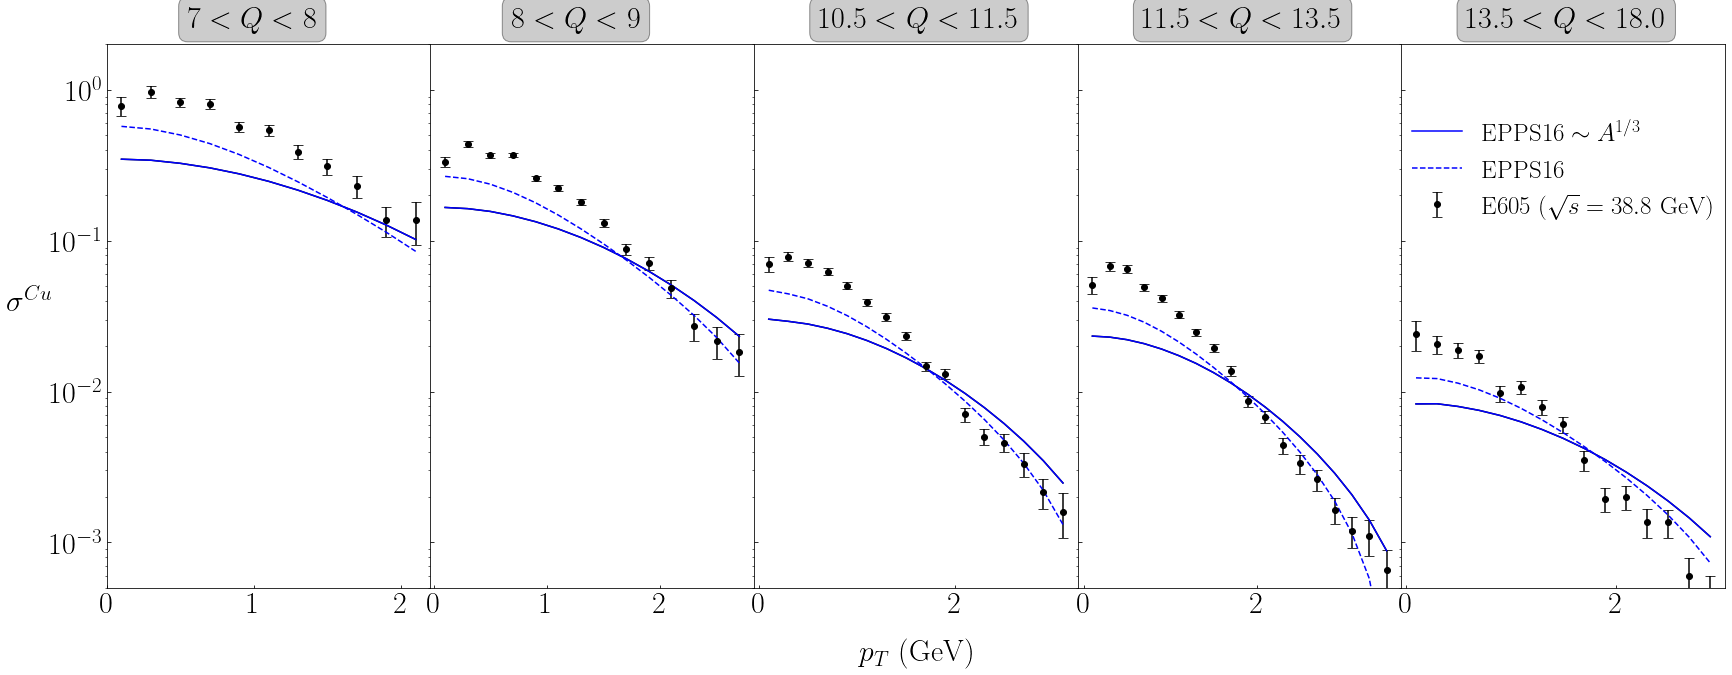

In [13]:
fig2,axs2 = plt.subplots(1,5, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})

dyplot(axs2[0], E605_Qbin1, 'black')
dyplot(axs2[1], E605_Qbin2, 'black')
dyplot(axs2[2], E605_Qbin3, 'black')
dyplot(axs2[3], E605_Qbin4, 'black')
dyplotlabel(axs2[4], E605_Qbin5, 'black', r'\rm E605 ($\sqrt{s} = 38.8$ GeV)')

dyplot3(axs2[0], E605_Qbin1, 'blue')
dyplot3(axs2[1], E605_Qbin2, 'blue')
dyplot3(axs2[2], E605_Qbin3, 'blue')
dyplot3(axs2[3], E605_Qbin4, 'blue')
dyplot3(axs2[4], E605_Qbin5, 'blue')


dyplotoff(axs2[0], E605_off_Qbin1, 'blue')
dyplotoff(axs2[1], E605_off_Qbin2, 'blue')
dyplotoff(axs2[2], E605_off_Qbin3, 'blue')
dyplotoff(axs2[3], E605_off_Qbin4, 'blue')
dyplotofflabel(axs2[4], E605_off_Qbin5, 'blue', r'\rm EPPS16')


# log scale
axs2[0].set_yscale('log')
axs2[0].set_ylim(5*1e-4,2*1e0)


# Set Labels
axs2[0].set_ylabel(r"\rm $\sigma^{Cu}$", fontsize = 30,rotation = 0,labelpad = 20)
axs2[2].set_xlabel(r"\rm $p_T $ (GeV)", fontsize = 30, labelpad = 20)


#Figure
props2 = dict(boxstyle='round', facecolor='gray', alpha=0.4)

axs2[0].text(0.25, 1.07,  r'\rm $7 < Q < 8$', transform=axs2[0].transAxes, fontsize=30, color = 'black',
    verticalalignment='top', bbox=props2)

axs2[1].text(0.25, 1.07,  r'\rm $8 < Q < 9$ ', transform=axs2[1].transAxes, fontsize=30, color = 'black',
    verticalalignment='top', bbox=props2)

axs2[2].text(0.20, 1.07,  r'\rm $10.5 < Q < 11.5$', transform=axs2[2].transAxes, fontsize=30, color = 'black',
    verticalalignment='top', bbox=props2)

axs2[3].text(0.20, 1.07,  r'\rm $11.5 < Q < 13.5$', transform=axs2[3].transAxes, fontsize=30, color = 'black',
    verticalalignment='top', bbox=props2)

axs2[4].text(0.20, 1.07,  r'\rm $13.5 < Q < 18.0$', transform=axs2[4].transAxes, fontsize=30, color = 'black',
    verticalalignment='top', bbox=props2)


#axs.legend(frameon = False,fontsize = 25,loc='upper center', bbox_to_anchor=(1.23, 0.8))


axs2[4].legend(frameon = False,fontsize = 25,loc='upper center', bbox_to_anchor=(0.5, 0.9))


fig2.set_size_inches(29, 10)


In [15]:
#save figs
fig2.savefig('Drell-Yan_E605.pdf', bbox_inches = "tight")

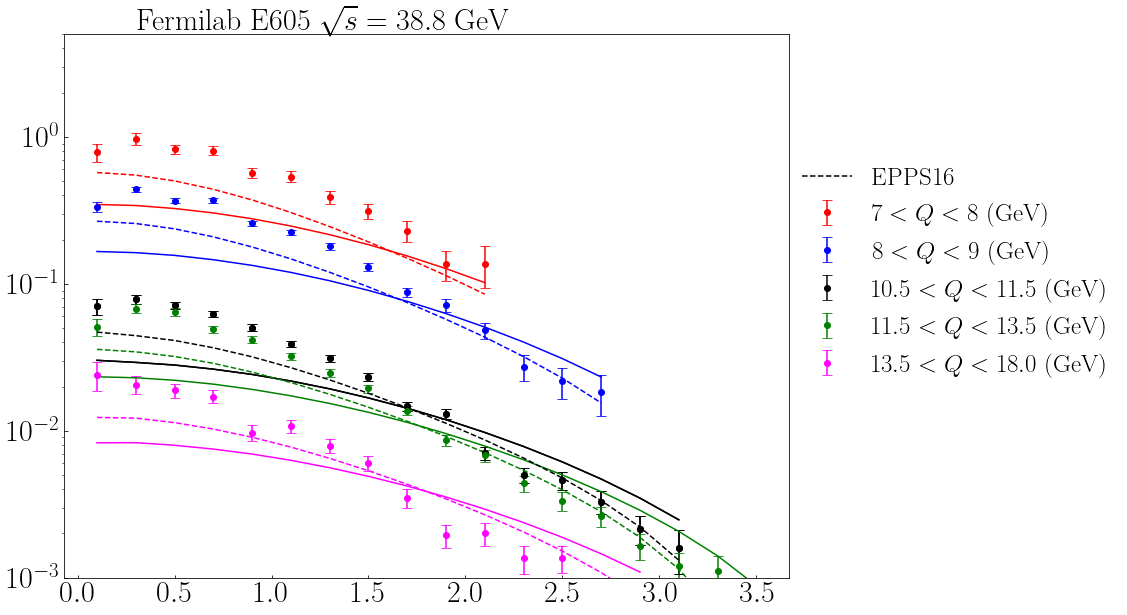

In [25]:
fig,axs = plt.subplots(1,1, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})


dyplotlabel(axs, E605_Qbin1, 'red', r'\rm $7 < Q < 8$ (GeV)')
dyplotlabel(axs, E605_Qbin2, 'blue', r'\rm $8 < Q < 9$ (GeV)')
dyplotlabel(axs, E605_Qbin3, 'black', r'\rm $10.5 < Q < 11.5$ (GeV)')
dyplot(axs,E605_Qbin3, 'black')
dyplotlabel(axs, E605_Qbin4, 'green', r'\rm $11.5 < Q < 13.5$ (GeV)')
dyplotlabel(axs, E605_Qbin5, 'magenta', r'\rm $13.5 < Q < 18.0$ (GeV)')

dyplotoff(axs, E605_off_Qbin1, 'red')
dyplotoff(axs, E605_off_Qbin2, 'blue')
dyplotofflabel(axs, E605_off_Qbin3, 'black', r'\rm EPPS16')
dyplotoff(axs, E605_off_Qbin4, 'green')
dyplotoff(axs, E605_off_Qbin5, 'magenta')

# log scale
axs.set_yscale('log')
axs.set_ylim(1e-3,5*1e0)


#Figure
fig.set_size_inches(10,10)
props = dict(boxstyle='round', facecolor='white', alpha=0)

axs.text(0.1, 1.05,  r"\rm Fermilab E605 $\sqrt{s} = 38.8$ GeV", transform=axs.transAxes, fontsize=30, color = 'black',
    verticalalignment='top', bbox=props)


axs.legend(frameon = False,fontsize = 25,loc='upper center', bbox_to_anchor=(1.23, 0.8))

fig.set_size_inches(13,10)

plt.show()